In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error
import yfinance as yf

In [4]:
ticker=input("Enter the ticker: ")
ticker=ticker.upper()
# ticker="AAPL"
spy=yf.Ticker(ticker)
history=spy.history(period="max")
df=pd.DataFrame(history,columns=["Close"])
df.head()

Enter the ticker: AAPL


,Close
Date,
1980-12-12 00:00:00-05:00,0.098597
1980-12-15 00:00:00-05:00,0.093453
1980-12-16 00:00:00-05:00,0.086594
1980-12-17 00:00:00-05:00,0.088737
1980-12-18 00:00:00-05:00,0.091310


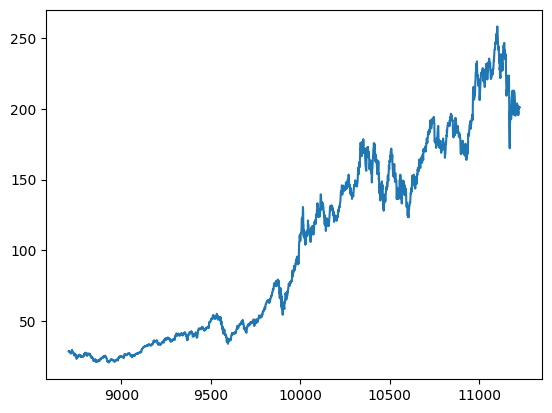

In [30]:
df2 = df.reset_index()[['Close']].tail(252*10)
plt.plot(df2)

In [31]:
scaler = MinMaxScaler()
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))
df2.shape

(2520, 1)

In [32]:
train_size = int(len(df2)*0.65)
test_size = len(df2) - train_size
train_data,test_data = df2[0:train_size,:],df2[train_size:len(df2),:1]

In [33]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [34]:
time_step = 100
X_train,Y_train =  create_dataset(train_data,time_step)
X_test,Y_test =  create_dataset(test_data,time_step)

In [35]:
print(X_train.shape)
print(X_train)
print(X_test.shape)
print(Y_test.shape)

(1537, 100)
[[0.03336689 0.03282049 0.0338379  ... 0.02820313 0.02773747 0.02412618]
 [0.03282049 0.0338379  0.03326325 ... 0.02773747 0.02412618 0.02349893]
 [0.0338379  0.03326325 0.03255673 ... 0.02412618 0.02349893 0.02312832]
 ...
 [0.52642446 0.51728648 0.50991841 ... 0.65398952 0.63867336 0.63285229]
 [0.51728648 0.50991841 0.51263515 ... 0.63867336 0.63285229 0.65337044]
 [0.50991841 0.51263515 0.51354067 ... 0.63285229 0.65337044 0.62430657]]
(781, 100)
(781,)


In [36]:
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (X_train.shape[1],1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 100,batch_size = 64,verbose = 1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - loss: 0.0211 - val_loss: 0.0041
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 213ms/step - loss: 5.6329e-04 - val_loss: 0.0017
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - loss: 3.0587e-04 - val_loss: 0.0019
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 276ms/step - loss: 2.4073e-04 - val_loss: 0.0016
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 217ms/step - loss: 2.3809e-04 - val_loss: 0.0014
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - loss: 2.3696e-04 - val_loss: 0.0015
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 271ms/step - loss: 2.0898e-04 - val_loss: 0.0014
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 197ms/step - loss: 2.1707e-04 - val_loss: 0.0020
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - loss: 2.3923e-04 - val_loss: 0.0012
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - loss: 2.2744e-04 - val_loss: 0.0036
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - loss: 4.6023e-04 - val_loss: 0.00

In [39]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


In [40]:
print(math.sqrt(mean_squared_error(Y_train,train_predict)))
print(math.sqrt(mean_squared_error(Y_test,test_predict)))

74.32190758858633
184.47018212595705


In [41]:
look_back = 100

In [42]:
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back : len(train_predict)+look_back,:] = train_predict

In [43]:
testPredictPlot = np.empty_like(df2)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back)*2 + 1 : len(df2) - 1,:] = test_predict

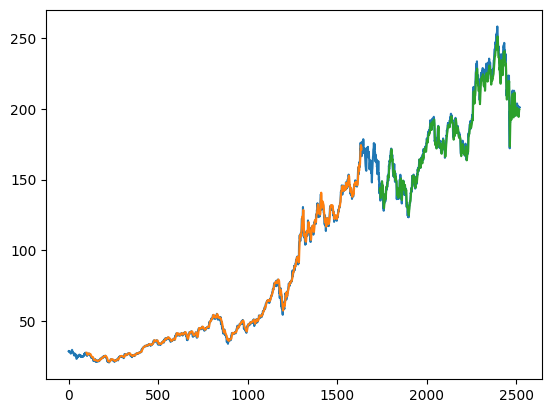

In [44]:
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()